# Airbnb Data Analysis | New York

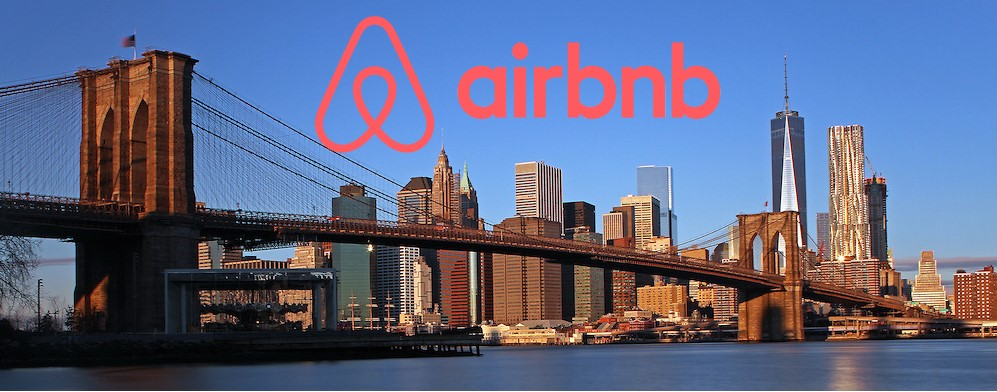

## Table of Contents

1. [**Introduction**](#1)
	- Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries
    - Reading in Data
    - Exploring Data
3. [**Data Cleaning**](#3)
	- Deleting Redundant Columns
    - Dropping Duplicates
    - Cleaning Individual Columns
    - Removing NaN Values
    - Transformations
4. [**Data Analysis & Visualization**](#4)
	- Correlation
    - Prices by Neighbourhood
    - Room Types by Boroughs
    - Most Reviewed Listings and Average Price
5. [**Conclusion**](#5)

# 1

## Introduction

Since 2008, [Airbnb](https://www.airbnb.com/?c=.pi0.pk36239956_25650614176&ghost=true&gclid=Cj0KCQiA54KfBhCKARIsAJzSrdrNpMYW7ZJ28xidn706D5rmrj72hWhycU6ZV87vOTx7Ck_DSjfejpMaAh0oEALw_wcB) has been a platform for searching and booking accommodations between hosts and travelers who want to rent them. More than 34,000 cities and 191 countries are represented, totaling more than 1.5 million advertisements. The most populated metropolis in the country and one of the top commercial and tourist destinations worldwide is New York City.

### Project Description

**Goals:** We will conduct a *descriptive* and *exploratory analysis* of the data in order to explore how each variable's phenomena act separately and in relation to one another. The analysis will have a clear, concise framework that is well-detailed across all areas, with the goal of simultaneously creating an easy-to-follow manual outlining the actions that must be taken to conduct an effective analysis.


### Data Description

**Content:** The data file contains all the details required to learn more about hosts and geographic availability, perform analysis, come to conclusions.

- **id**: listing ID
- **name**: name of the listing
- **host_id**: host ID
- **host_name**: name of the host
- **neighbourhood_group**: location
- **neighbourhood**: area
- **latitude**: latitude coordinates
- **longitude**: longitude coordinates
- **room_type**: listing space type
- **price**: price in USD dollars
- **minimum_nights**: number of nights minimum
- **number_of_reviews**: number of reviews
- **last_review**: latest review
- **reviews_per_month**: number of reviews per month
- **calculated_host_listings_count**: number of listings per host
- **availability_365**: number of days when listing is available for booking
- **number_of_reviews_ltm**: number of reviews last twelve months (ltm)

**Acknowledgements:** This [public dataset](http://insideairbnb.com/get-the-data/) is available on Inside Airbnb website.

**Questions to be Answered**:
- What can we discover about various hosts and regions?
- Do the traffic patterns in the various places differ noticeably, and if so, what may the explanation be?

# 2

## Acquaring and Loading Data

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from collections import Counter # count the occurrences of elements
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly as py  # interactive plots
import plotly.graph_objs as go
import cufflinks as cf  # interactive plots in pandas style
from plotly.offline import iplot, init_notebook_mode # offline mode
cf.go_offline(connected = True) # enable plotly's offline mode 
init_notebook_mode(connected = True) # configure to display plotly charts

# avoiding display of truncated columns 
pd.options.display.max_columns = 30
pd.options.display.max_colwidth = 60

pd.options.display.float_format = '{:,.3f}'.format # pandas display format

### Read in Data

In [2]:
airbnb = pd.read_csv('listings.csv')

### Exploring the AirBnb Data

Firstly, let's check number of rows and columns in a given dataset to understand the size we are working with.

In [3]:
print('Total Rows:', airbnb.shape[0])
print('Total Columns:', airbnb.shape[1])
airbnb.head()

Total Rows: 39453
Total Columns: 18


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Rental unit in New York · ★4.68 · Studio · 1 bed · 1 bath,2845,Jennifer,Manhattan,Midtown,40.754,-73.986,Entire home/apt,240,30,49,2022-06-21,0.290,3,365,0,NaN
1,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · 1 bed,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685,-73.955,Private room,66,30,50,2019-12-02,0.290,2,177,0,NaN
2,5136,Rental unit in Brooklyn · ★4.75 · 2 bedrooms · 2 beds · ...,7378,Rebecca,Brooklyn,Sunset Park,40.663,-73.995,Entire home/apt,235,30,4,2023-08-20,0.030,1,65,1,NaN
3,6848,Rental unit in Brooklyn · ★4.58 · 2 bedrooms · 1 bed · 1...,15991,Allen & Irina,Brooklyn,Williamsburg,40.709,-73.953,Entire home/apt,81,30,191,2023-08-14,1.100,1,239,6,NaN
4,6872,Condo in New York · 1 bedroom · 1 bed · 1 shared bath,16104,Kae,Manhattan,East Harlem,40.801,-73.943,Private room,65,30,1,2022-06-05,0.070,2,365,0,NaN


Now, let's check the type of every column in the dataset.

In [4]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

**Insights:**

- These 18 columns give us a significantly rich amount of information that we can use to perform highly in-depth data exploration on this dataset. 
- It appears that there is some missing data, thus processing and cleaning NaN values will be necessary. 

# 3

## Data Cleaning
We could identify several NaN values after looking at the head of the dataset, thus we must further investigate missing values before moving on to the analysis.

Let's see which columns contain null values first by using the `sum` function.

In [5]:
airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10241
reviews_per_month                 10241
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           39453
dtype: int64

**Insights:**
- It appears that missing data does not require a lot of special attention. Further observations may be made based on the characteristics of our dataset: 
	- The column `host_name` is unethical and unrelated to our data analysis. There shouldn't be any logic for continuing data investigation against particular people based on their names. 
    
    - The columns `last_review` and `reviews_per_month` need simple handling. To clarify, `last_review` refers to the date; if there are no reviews for the listing, date will be absent. Since this column is not important in our situation, thus it is not necessary to append those data. The column `reviews_per_month` can be handled by simply appending it with 0.0 missing values.
    
    - The column `number_of_reviews` will have a 0, thus using this reasoning, with 0 total reviews there will be 0.0 rate of reviews per month.
    
Now, let's manage missing data and get rid of unnecessary columns.

In [6]:
# dropping unnecessary columns
airbnb.drop(['id', 'host_name', 'last_review'], axis = 1, inplace = True)
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Rental unit in New York · ★4.68 · Studio · 1 bed · 1 bath,2845,Manhattan,Midtown,40.754,-73.986,Entire home/apt,240,30,49,0.290,3,365,0,NaN
1,Rental unit in Brooklyn · ★4.52 · 1 bedroom · 1 bed,7356,Brooklyn,Bedford-Stuyvesant,40.685,-73.955,Private room,66,30,50,0.290,2,177,0,NaN
2,Rental unit in Brooklyn · ★4.75 · 2 bedrooms · 2 beds · ...,7378,Brooklyn,Sunset Park,40.663,-73.995,Entire home/apt,235,30,4,0.030,1,65,1,NaN
3,Rental unit in Brooklyn · ★4.58 · 2 bedrooms · 1 bed · 1...,15991,Brooklyn,Williamsburg,40.709,-73.953,Entire home/apt,81,30,191,1.100,1,239,6,NaN
4,Condo in New York · 1 bedroom · 1 bed · 1 shared bath,16104,Manhattan,East Harlem,40.801,-73.943,Private room,65,30,1,0.070,2,365,0,NaN


In [7]:
# replacing all NaN values in reviews_per_month with 0
airbnb.fillna({'reviews_per_month': 0}, inplace = True)

# checking changes
airbnb.reviews_per_month.isnull().sum()

0

Next step is to look at some interesting unique values and categorical data that we have in our dataset. Unique values of `neighbourhood_group`, `neighbourhood`, and `room_type` will be extremely helpful.

In [8]:
airbnb.neighbourhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
len(airbnb.neighbourhood.unique())

223

In [10]:
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

Let's extract rating from column `name` and then get rid of the `name` column itself, leaving only the `rating` one.

In [11]:
# regular expression pattern to extract the rating
rating_pattern = r'★([\d.]+)'

# using regex and creating a new 'rating' column, handling missing values
airbnb['rating'] = airbnb['name'].str.extract(rating_pattern, expand=False)

# dropping the 'name' column
airbnb = airbnb.drop('name', axis=1)

print(airbnb[['rating']])

      rating
0       4.68
1       4.52
2       4.75
3       4.58
4        NaN
...      ...
39448    NaN
39449    NaN
39450    NaN
39451    NaN
39452    NaN

[39453 rows x 1 columns]


# 4

## Data Analysis & Visualization
### Correlation
Firstly, let's get correlation between different variables in our dataset.

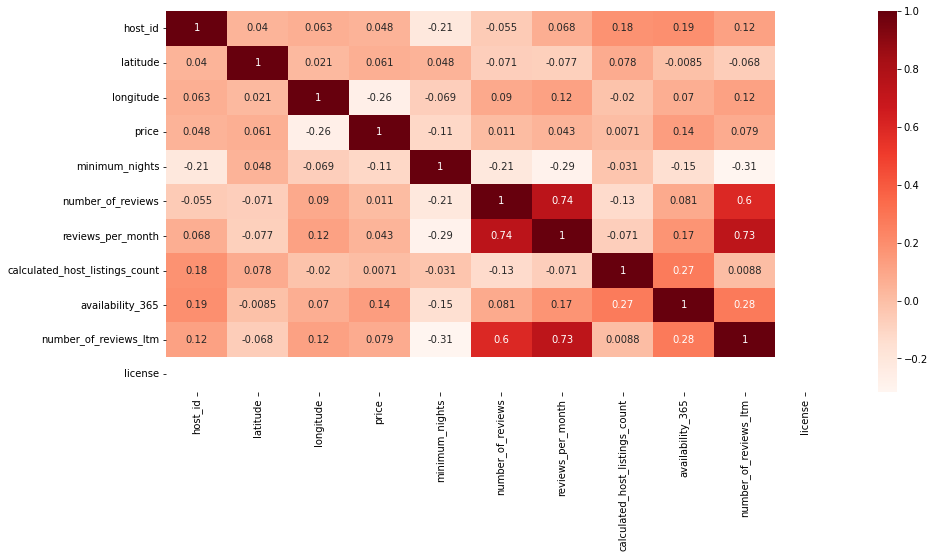

In [12]:
# filtering for numerical columns
numerical_columns = airbnb.select_dtypes(include=['number'])

# correlation matrix using kendall method
corr = numerical_columns.corr(method='kendall')

# heatmap plot
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.show()

### Prices by Neighbourhood
Now, let's learn more about the neighborhoods, which are represented by the names **Manhattan**, **Brooklyn**, **Queens**, **Staten Island**, and **Bronx**.

In [13]:
# Manhattan
location_1 = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_loc1 = location_1[['price']]

# Brooklyn
location_2 = airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_loc2 = location_2[['price']]

# Queens
location_3 = airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_loc3 = location_3[['price']]

# Staten Island
location_4 = airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_loc4 = location_4[['price']]

# Bronx
location_5 = airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_loc5 = location_5[['price']]

# create list of prices' dataframes
price_list = [price_loc1, price_loc2, price_loc3, price_loc4, price_loc5]

In [14]:
# empty list that will be appended with price distributions for each neighbourhood
price_list_2 = []

# list with neighbourhood_group values
neighbourhood_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

# get statistics for price ranges and append it to the empty list
for value in price_list:
    i = value.describe(percentiles = [.25, .50, .75])
    i = i.iloc[3:]
    i.reset_index(inplace = True)
    i.rename(columns = {'index':'Statistics'}, inplace = True)
    price_list_2.append(i)
    
# replace the pricing columns names with the areas names
price_list_2[0].rename(columns = {'price': neighbourhood_list[0]}, inplace = True)
price_list_2[1].rename(columns = {'price': neighbourhood_list[1]}, inplace = True)
price_list_2[2].rename(columns = {'price': neighbourhood_list[2]}, inplace = True)
price_list_2[3].rename(columns = {'price': neighbourhood_list[3]}, inplace = True)
price_list_2[4].rename(columns = {'price': neighbourhood_list[4]}, inplace = True)

# modifying df
df_statistics = price_list_2
df_statistics = [df.set_index('Statistics') for df in df_statistics]
df_statistics = df_statistics[0].join(df_statistics[1:])
df_statistics

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Statistics,,,,,
min,0.000,10.000,10.000,20.000,10.000
25%,112.000,69.000,60.000,75.000,60.000
50%,180.000,115.000,95.000,102.000,90.000
75%,305.000,190.000,153.750,156.000,146.000
max,"30,000.000","25,000.000","10,000.000","1,200.000","10,000.000"


The table indicates that there's a few extreme values; as a result, we must eliminate them for better data visualization. A great option would be to create a sub-dataframe with no extreme values (price less than $500).

In [15]:
sub_df = airbnb[airbnb.price < 500]

In [16]:
import plotly.express as px
fig = px.violin(x = sub_df['neighbourhood_group'], 
                 y = sub_df['price'],
                 template = 'plotly_white', 
                 color = sub_df['neighbourhood_group'],
                 color_discrete_sequence = ['#FF5A5F', '#00A699', '#FC642D', '#484848', '#767676'],
                 labels = dict(x = 'Neighbourhood', y = 'Price', color = 'Colors')
                 )          
fig.show()

**Insights:**
The violin plot illustrates the density and price distribution in **Brooklyn**, **Manhattan**, **Queens**, **Staten Island**, and **Bronx** neighborhoods. A few things become clear about how Airbnb pricing are distributed around the boroughs of New York City by using a statistical table and a violin plot.

- Brooklyn is second in price per night at around 90 dollars, while Manhattan has the highest price range of the listings at 150 dollars. 

- Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. 

- This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

### Room Types by Boroughs
Next step is to choose just the top 10 neighborhoods with the most listings and combine them with the boroughs and room type for a better visualization.

In [17]:
airbnb.neighbourhood.value_counts().head(10)

neighbourhood
Bedford-Stuyvesant    2727
Williamsburg          2304
Midtown               2000
Harlem                1838
Bushwick              1648
Hell's Kitchen        1562
Upper West Side       1504
Upper East Side       1494
Crown Heights         1232
East Village          1091
Name: count, dtype: int64

In [18]:
# top 10 neighbourhoods for sub df
df_sub = airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem',
                                                  'Bushwick','Upper West Side','Hell\'s Kitchen',
                                                  'East Village', 'Upper East Side','Crown Heights','Midtown']
                                                )]


Now, let's generate a plot with subplots, so it's easier to compare distributions across various attributes. 

- For each subplot, *Y* and *X* will remain precisely the same; *Y* indicates a count of observations, and *X* represents the observations we wish to count.
- The two distinct subplots will be determined by column and color. We will be able compare our *Y* and *X* axes between the selected column and color-codes once we define the column and choose the hue.

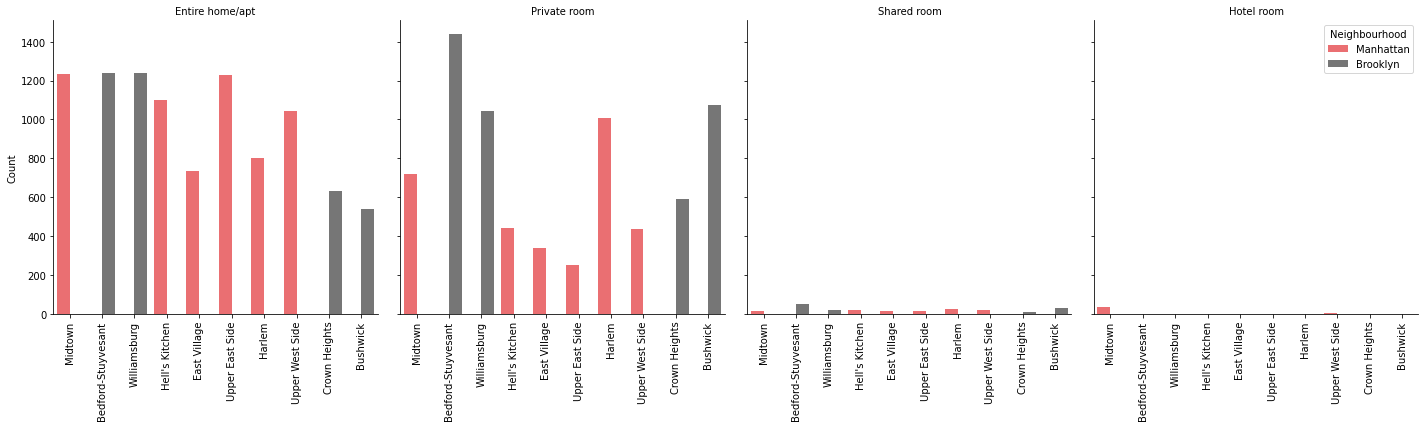

In [19]:
# catplot will be used to add multiple subplots in one consolidated chart
ax = sns.catplot(x = 'neighbourhood', 
                 hue = 'neighbourhood_group', 
                 col = 'room_type', 
                 data = df_sub, 
                 kind = 'count', 
                 legend = False, 
                 palette=('#FF5A5F', '#767676'))

ax.set_axis_labels('', 'Count')
ax.set_titles("{col_name}")
plt.legend(title = 'Neighbourhood', loc = 'upper right')
ax.set_xticklabels(rotation = 90)

**Insights:**
- Among the 10 neighborhoods with the most listings, the **Hotel room** type of Airbnb property is the least popular.
- Only Manhattan and Brooklyn, two of the most visited and touristic cities, are represented among these ten neighborhoods; this was obvious given that these two boroughs would have the largest listing availability.
- The most popular boroughs in Brooklyn are Bedford-Stuyvesant and Williamsburg, while in Manhattan is Harlem.

### Most Reviewed Listings and Average Price 
In this section of analysis, let's look at the `number_of_reviews` column and find the top 10 most reviewed listings in NYC and their average price.

In [20]:
most_reviewed = airbnb.nlargest(10, 'number_of_reviews') # get top 10
most_reviewed

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating
16251,266755066,Manhattan,East Village,40.724,-73.990,Private room,359,1,1834,39.550,4,297,449,NaN,4.54
21725,397872858,Manhattan,Theater District,40.764,-73.985,Private room,386,1,1516,54.600,9,361,275,NaN,4.66
24935,435369966,Manhattan,Financial District,40.710,-74.011,Private room,366,1,1498,79.820,6,260,637,NaN,4.43
21759,397872858,Manhattan,Theater District,40.762,-73.984,Private room,403,1,1120,40.380,9,363,218,NaN,4.65
16249,266755066,Manhattan,Lower East Side,40.723,-73.988,Private room,351,1,1105,25.250,4,291,219,NaN,4.41
21762,397872858,Manhattan,Theater District,40.762,-73.985,Private room,404,1,974,35.080,9,358,66,NaN,4.70
1046,6642777,Brooklyn,Williamsburg,40.712,-73.952,Private room,121,1,793,6.370,2,30,91,NaN,4.67
2220,6642777,Brooklyn,Williamsburg,40.711,-73.953,Private room,119,1,775,7.020,2,32,71,NaN,4.66
15148,259169672,Manhattan,Midtown,40.746,-73.985,Hotel room,515,1,747,15.420,10,359,4,NaN,4.59
23031,158969505,Manhattan,Lower East Side,40.723,-73.992,Entire home/apt,278,1,738,29.680,11,116,686,NaN,4.91


In [21]:
avg_price = most_reviewed.price.mean() # get average price
print('Average price / night: ', avg_price)

Average price / night:  330.2


**Insights:**

- Top 10 most reviewed listings on Airbnb for NYC have an average price of 330 dollars.
- Most of the listings are under 500 dollars. 
- 8/10 of the listings are **Private room** types.
- The most popular property has 1834 reviews.

# 5

## Conclusion
The in-depth data exploration was conducted on each important column supplied by this Airbnb dataset, and it proved to be a highly rich dataset with a range of columns.

Several key insights emerged from this analysis:

- **Brooklyn** is the second-highest average nightly price at around 90 dollars, while **Manhattan** leads with the highest price range, averaging $150 per night.
- **Queens** and **Staten Island** exhibit similar pricing distributions, while the **Bronx** stands out as the most affordable borough.
- These findings align with expectations, reflecting the well-known fact that Manhattan is one of the most expensive places to live, whereas the Bronx offers more budget-friendly options.

**Neighborhood Analysis**

- The **Hotel room** type is the least popular among Airbnb property types in these neighborhoods.
- Notably, only **Manhattan** and **Brooklyn**, two of the most visited and touristy boroughs, are among the top 10 neighborhoods, indicating their higher availability of listings.
- Within these boroughs, **Bedford-Stuyvesant** and **Williamsburg** in Brooklyn, and **Harlem** in Manhattan emerge as the most popular neighborhoods.

**Most Reviewed Listings**

Lastly, we investigated the top 10 most reviewed Airbnb listings in New York City, revealing the following insights:

- The average price among these highly reviewed listings is 330 dollars per night.
- The majority of these listings are priced under 500 dollars.
- **Private room** listings dominate, constituting 8 out of 10 of the most reviewed listings.
- The most popular property boasts an impressive 1834 reviews.

Overall, this project provides valuable insights into the pricing, popularity, and property types within the Airbnb market across different neighborhoods in New York City.

# Clean Data Export

In [22]:
file_path = 'listings_visual.csv'
airbnb.to_csv(file_path, index=False)

In [23]:
from IPython.display import FileLink

FileLink('listings_visual.csv')

/Users/elizavetagorelova/Jupyter/listings_visual.csv